#1. Machine Learning and Deep Learning in Stock Market price prediction?

## 1. Why Use ML/DL in Stock Prediction?

* Stock prices are influenced by historical data, market sentiment, news, macroeconomics, and investor psychology.
ML/DL models try to capture patterns in:

* Time series data (prices, returns, volume, indicators).

* Textual data (news, tweets, financial reports).

* Alternative data (Google trends, satellite images, credit card transactions).

## 2. Machine Learning Approaches

* Machine Learning typically relies on hand-crafted features (technical indicators, moving averages, RSI, MACD, etc.).

* Common ML Models:

    1. Linear Regression / Logistic Regression → Simple price/return prediction or direction (up/down).

    2. Random Forest, Gradient Boosting (XGBoost, LightGBM) → Handle nonlinearities, feature interactions.

    3. Support Vector Machines (SVM) → Classification of market movement.

    4. KNN, Naïve Bayes → Simple baseline models.

* ML usually requires feature engineering:

    * Technical indicators (SMA, EMA, Bollinger Bands, RSI).

    * Momentum features (daily return, lagged returns).

    * Volatility measures.

✅ Pros: Easier to interpret, less data-hungry.

❌ Cons: Limited ability to capture long-term temporal dependencies.

## 3. Deep Learning Approaches

* Deep Learning shines when working with sequential and high-dimensional data.

* Key DL Models:

    1. RNN (Recurrent Neural Networks)

        * Capture sequential dependencies in stock prices.

        * Limitation: vanishing gradient → struggles with long sequences.

    2. LSTM (Long Short-Term Memory) & GRU

       * Better for long-term memory of time series.

       * Widely used in stock forecasting.

    3. CNN (Convolutional Neural Networks)

       * Surprisingly effective in detecting local patterns in time series.

       * Can also analyze stock chart images (candlestick recognition).

    4. Transformers (Attention Models)

       * State-of-the-art for time series (e.g., Temporal Fusion Transformers, Informer).

       * Handle long dependencies better than LSTMs.

    5. Hybrid Models

       * CNN + LSTM (extract patterns + sequence learning).

       * Sentiment Analysis (BERT for news/tweets) + Price Forecasting (LSTM/Transformer).

## 4. Prediction Tasks

ML/DL in stock prediction can be applied to:

*   Price Forecasting → Predict next day/week price.
*   Return Prediction → Predict if return is positive/negative.
* Trend Classification → Uptrend, downtrend, sideways.
* Volatility Forecasting → Predict risk levels.
* Portfolio Optimization → Using predicted returns/risks for asset allocation.

## 5. Challenges

* Efficient Market Hypothesis (EMH): Prices already reflect all information, making true prediction hard.

* Noise: Stock data is noisy, with many random fluctuations.

* Overfitting: ML/DL models may learn noise instead of real patterns.

* Data Leakage: Improper preprocessing can lead to misleading results.


#2. IMPORT DATASETS AND LIBRARIES


In [73]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px             # for interactive, dynamic plots
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [75]:
# AAPL = Apple Stock
# BA = Boeing
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

stock_price_df = pd.read_csv('/content/drive/MyDrive/stock.csv')
stock_price_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


### volume dataset.
1. Each number is the trading volume (number of shares traded) for that stock on that day.
2. A price move with high volume = stronger signal.
3. A price move with low volume = weaker/less reliable signal.

In [76]:
# Read the stocks volume data
stock_vol_df = pd.read_csv("/content/drive/MyDrive/stock_volume.csv")
stock_vol_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000


In [77]:
# Sort the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])

In [78]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()


,0
Date,0
AAPL,0
BA,0
T,0
MGM,0
AMZN,0
IBM,0
TSLA,0
GOOG,0
sp500,0


In [79]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

,0
Date,0
AAPL,0
BA,0
T,0
MGM,0
AMZN,0
IBM,0
TSLA,0
GOOG,0
sp500,0


#3.  PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [80]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [81]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [82]:
# plot interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

In [83]:
def normalize(df):
  x = df.copy()

  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

interactive_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

#4. PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

## Step 1: Clarify the Goal

1. Predict individual stock prices (e.g., predict tomorrow’s AAPL price).

2. Predict stock returns (up or down) (classification: 1 = up, 0 = down).

3. Predict portfolio performance (combine all stocks into one portfolio).


## Step 2: Feature Engineering

1. From raw prices, you should create features:

2. Daily Returns: Return = (Price_t - Price_t-1) / Price_t-1

3. Log Returns: log(Price_t / Price_t-1)

4. Technical Indicators: SMA, EMA, RSI, MACD.

4. Lag Features: past values (like yesterday’s return) to predict the next day.

In [150]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [151]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price
# Target stock price today will be tomorrow's price
def trading_window(data):

  # 1 day window
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)

  # return the new dataset
  return data

In [152]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [153]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [154]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [155]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [156]:
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [157]:
price_volume_target_scaled_df.shape

(2158, 3)

In [158]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [159]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((2158, 2), (2158, 1))

In [160]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [161]:
X_train.shape, y_train.shape

((1402, 2), (1402, 1))

In [162]:
X_test.shape, y_test.shape

((756, 2), (756, 1))

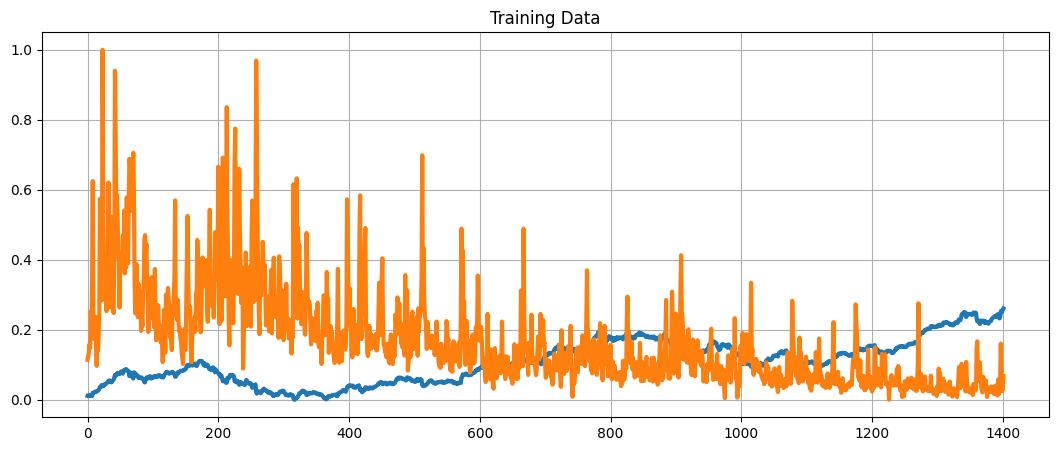

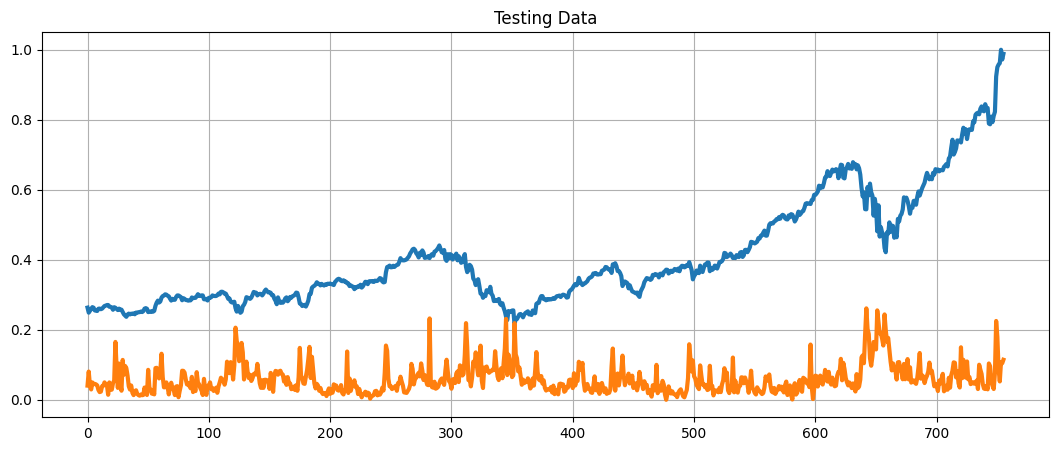

In [163]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

#5. REGRESSION

In [164]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [165]:
# Test the model and calculate its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.7950028030821767


In [166]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([0.03466412, 0.03374627, 0.03451936, ..., 0.81048342, 0.78876033,
       0.80091324])

In [167]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i)

In [168]:
Predicted

[np.float64(0.03466412066813623),
 np.float64(0.033746272122637866),
 np.float64(0.034519358374986236),
 np.float64(0.034556003426505555),
 np.float64(0.034707417256940834),
 np.float64(0.0272353909726644),
 np.float64(0.03304435664695353),
 np.float64(0.02253833228247727),
 np.float64(0.015366432147886962),
 np.float64(0.03723482148664508),
 np.float64(0.038835937932053866),
 np.float64(0.03762457555962902),
 np.float64(0.03816017127371425),
 np.float64(0.04238142210970154),
 np.float64(0.04502630930569739),
 np.float64(0.042773672451817804),
 np.float64(0.045290920065069885),
 np.float64(0.044289332606441106),
 np.float64(0.043246247234314326),
 np.float64(0.03101785239420905),
 np.float64(0.04003378113028107),
 np.float64(0.04664107856772606),
 np.float64(0.05057271537215566),
 np.float64(0.01028089840085819),
 np.float64(0.03141631904427818),
 np.float64(0.045849070023290646),
 np.float64(0.04694698644395233),
 np.float64(0.05076555542093848),
 np.float64(0.048707247219661465),
 np

In [169]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])


In [170]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [171]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [172]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2012-01-12,0.011026,0.034664
1,2012-01-13,0.010462,0.033746
2,2012-01-17,0.012209,0.034519
3,2012-01-18,0.013785,0.034556
4,2012-01-19,0.013299,0.034707
...,...,...,...
2153,2020-08-04,0.957606,0.778280
2154,2020-08-05,0.961583,0.783205
2155,2020-08-06,1.000000,0.810483
2156,2020-08-07,0.972088,0.788760


In [173]:
def plot_predictions(df, date_col="Date", actual_col="Close", pred_col="Prediction", title="Actual vs Predicted"):
    # Ensure Date is datetime
    df[date_col] = pd.to_datetime(df[date_col])

    plt.figure(figsize=(12,6))
    plt.plot(df[date_col], df[actual_col], label="Actual", linewidth=2)
    plt.plot(df[date_col], df[pred_col], label="Predicted", linewidth=2, linestyle="--")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Returns")
    plt.legend()
    plt.show()


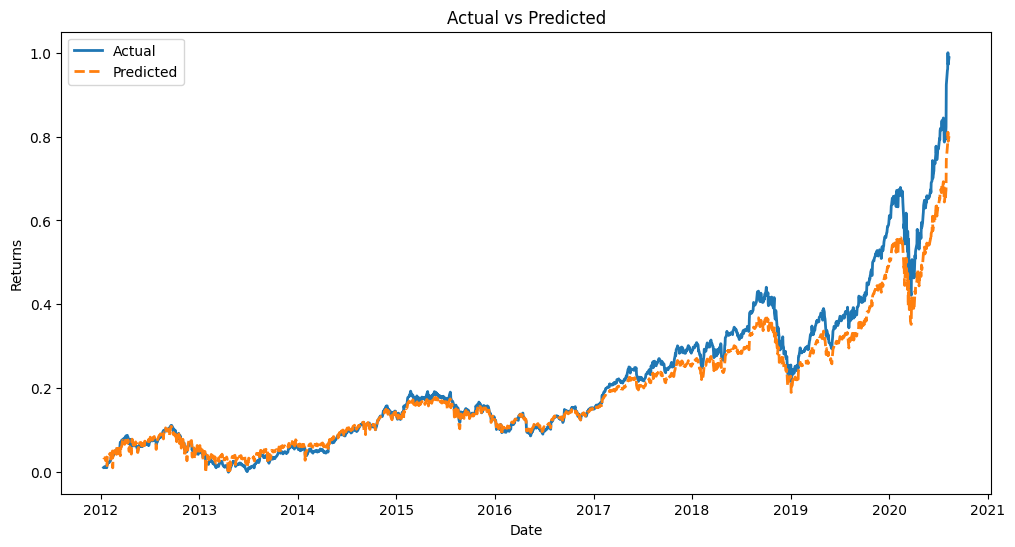

In [174]:
plot_predictions(df_predicted, date_col="Date", actual_col="Close", pred_col="Prediction", title="Actual vs Predicted")

#6. TRAIN AN LSTM TIME SERIES MODEL

In [121]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [122]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [123]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [124]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [125]:
X

[array([0.00828228]),
 array([0.00524163]),
 array([0.00741423]),
 array([0.01423076]),
 array([0.0172951]),
 array([0.01771253]),
 array([0.01800663]),
 array([0.01736626]),
 array([0.02277871]),
 array([0.01915935]),
 array([0.01816315]),
 array([0.01658831]),
 array([0.0163037]),
 array([0.02184418]),
 array([0.02253203]),
 array([0.03171561]),
 array([0.03144519]),
 array([0.03273549]),
 array([0.03411583]),
 array([0.0350598]),
 array([0.03064355]),
 array([0.03497445]),
 array([0.034372]),
 array([0.03092341]),
 array([0.03794869]),
 array([0.03946186]),
 array([0.03992672]),
 array([0.03776843]),
 array([0.04051967]),
 array([0.04160122]),
 array([0.04247878]),
 array([0.04465612]),
 array([0.04157279]),
 array([0.04556211]),
 array([0.04344649]),
 array([0.04093236]),
 array([0.03098508]),
 array([0.03538239]),
 array([0.04168189]),
 array([0.04403469]),
 array([0.04413903]),
 array([0.05593158]),
 array([0.05513944]),
 array([0.05908607]),
 array([0.05983085]),
 array([0.06247

In [126]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [127]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [128]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [129]:
# Create the model
import keras
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 150)         │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 150)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 150)         │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 150)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 452,551 (1.73 MB)

 Trainable params: 452,551 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0554 - val_loss: 0.0633
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - val_loss: 0.0034
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.1299e-04 - val_loss: 4.7523e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8454e-04 - val_loss: 3.0792e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4863e-04 - val_loss: 1.8170e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.7641e-04 - val_loss: 6.4723e-05
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.6075e-04 - val_loss: 5.0571e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.0556e-04 - val_loss: 1.1189e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0386e-04 - val_loss: 5.0884e-05
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9881e-04 - val_loss: 3.4788e-05
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.8958e-04 - val_loss: 1.

In [131]:
# Make prediction
predicted = model.predict(X)

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [132]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i)

In [133]:
test_predicted

[array([0.0094694], dtype=float32),
 array([0.00649068], dtype=float32),
 array([0.00861904], dtype=float32),
 array([0.01529649], dtype=float32),
 array([0.01829814], dtype=float32),
 array([0.01870704], dtype=float32),
 array([0.01899512], dtype=float32),
 array([0.01836785], dtype=float32),
 array([0.02366934], dtype=float32),
 array([0.02012423], dtype=float32),
 array([0.01914842], dtype=float32),
 array([0.01760582], dtype=float32),
 array([0.01732704], dtype=float32),
 array([0.02275399], dtype=float32),
 array([0.02342772], dtype=float32),
 array([0.03242218], dtype=float32),
 array([0.03215735], dtype=float32),
 array([0.03342099], dtype=float32),
 array([0.03477278], dtype=float32),
 array([0.03569721], dtype=float32),
 array([0.03137227], dtype=float32),
 array([0.03561363], dtype=float32),
 array([0.03502366], dtype=float32),
 array([0.03164634], dtype=float32),
 array([0.03852621], dtype=float32),
 array([0.04000797], dtype=float32),
 array([0.04046317], dtype=float32),
 a

In [134]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
5,2012-01-20
...,...
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07
2157,2020-08-10


In [135]:
df_predicted['predictions'] = test_predicted

In [136]:
df_predicted

,Date,predictions
1,2012-01-13,[0.009469401]
2,2012-01-17,[0.0064906757]
3,2012-01-18,[0.008619038]
4,2012-01-19,[0.015296487]
5,2012-01-20,[0.018298142]
...,...,...
2154,2020-08-05,[0.9048785]
2155,2020-08-06,[0.91356736]
2156,2020-08-07,[0.9222861]
2157,2020-08-10,[0.9231491]


In [137]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])


In [138]:
df_predicted['Close'] = close[1:]

In [139]:
df_predicted

,Date,predictions,Close
1,2012-01-13,[0.009469401],0.005242
2,2012-01-17,[0.0064906757],0.007414
3,2012-01-18,[0.008619038],0.014231
4,2012-01-19,[0.015296487],0.017295
5,2012-01-20,[0.018298142],0.017713
...,...,...,...
2154,2020-08-05,[0.9048785],0.972307
2155,2020-08-06,[0.91356736],0.982453
2156,2020-08-07,[0.9222861],0.983459
2157,2020-08-10,[0.9231491],0.987819


In [ ]:
def plot_results(df, date_col="Date", actual_col="Close", pred_col="predictions", title="AAPL Actual vs Predicted"):
    # Ensure Date is datetime
    df[date_col] = pd.to_datetime(df[date_col])

    # If predictions are lists like [0.009], flatten them
    df[pred_col] = df[pred_col].apply(lambda x: float(x[0]) if isinstance(x, (list, tuple)) else float(x))

    plt.figure(figsize=(12,6))
    plt.plot(df[date_col], df[actual_col], label="Actual", linewidth=2)
    plt.plot(df[date_col], df[pred_col], label="Predicted", linewidth=2, linestyle="--")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Returns")
    plt.legend()
    plt.show()

/tmp/ipython-input-1518438416.py:8: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



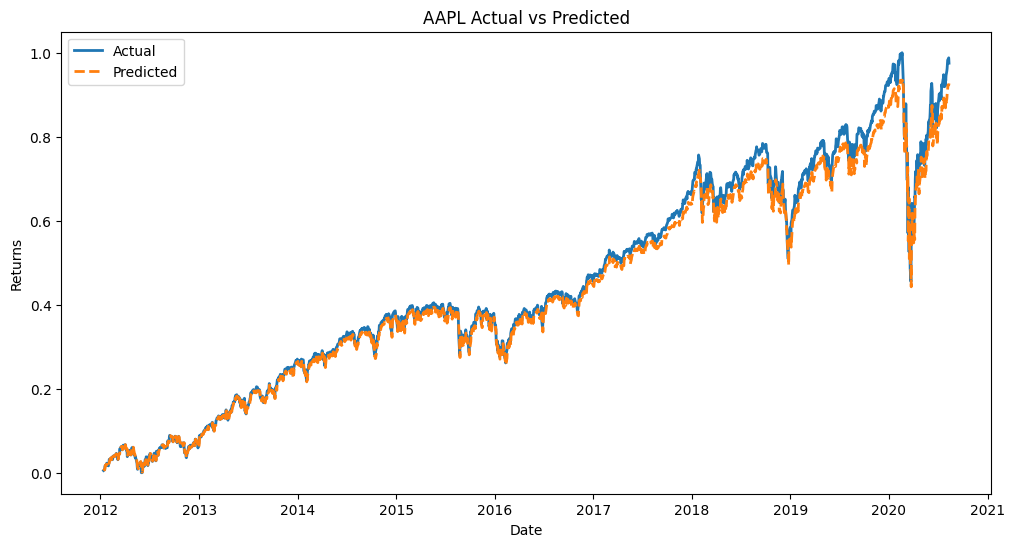

In [140]:
# Plot the data
plot_results(df_predicted, date_col="Date", actual_col="Close", pred_col="predictions", title="AAPL Actual vs Predicted")